<a href="https://colab.research.google.com/github/palak-sketch/Mini-project/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [19]:
#Preprocessing

import os
import numpy as np

target = []
images = []
flat_data = []

dataDir = '/content/drive/MyDrive/mini project/Images'
categories = ['daisy','rose']

for c in categories:
  class_num = categories.index(c)   #Label encoding
  path = os.path.join(dataDir,c)    #Create path to use all images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))   #Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [20]:
flat_data[0]

array([0.18614379, 0.13819608, 0.24606536, ..., 0.55569935, 0.47895425,
       0.95333333])

In [21]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

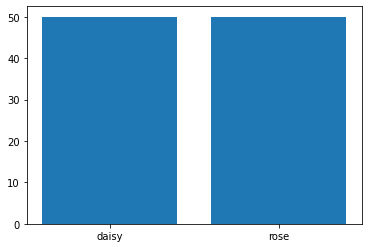

In [22]:
unique,count = np.unique(target,return_counts=True)
plt.bar(categories,count)

In [23]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [26]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
accuracy_score(y_pred,y_test)

0.8

In [29]:
confusion_matrix(y_pred,y_test)

array([[10,  3],
       [ 3, 14]])

In [30]:
# Save model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [31]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://images.unsplash.com/photo-1560717789-0ac7c58ac90a?ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8ZGFpc3l8ZW58MHx8MHx8&ixlib=rb-1.2.1&w=1000&q=80
(667, 1000, 3)
 PREDICTED OUTPUT: daisy


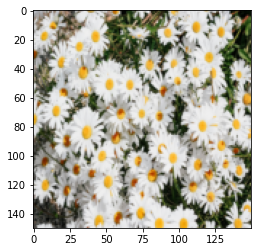

In [33]:
#Testing new image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')